# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL

units = "metric"
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=" + units




# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
       
    
    # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | valparaiso
Processing Record 2 of Set 1 | flying fish cove
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | jayapura
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | ahau
City not found. Skipping...
Processing Record 8 of Set 1 | kismayo
Processing Record 9 of Set 1 | callao
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | zemio
Processing Record 12 of Set 1 | buguda
Processing Record 13 of Set 1 | vilyuchinsk
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | armyansk
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | moyynkum
Processing Record 18 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | moya

Processing Record 42 of Set 4 | walvis bay
Processing Record 43 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | sake
Processing Record 46 of Set 4 | tarawa
Processing Record 47 of Set 4 | gloria
Processing Record 48 of Set 4 | taiohae
City not found. Skipping...
Processing Record 49 of Set 4 | constantia
Processing Record 0 of Set 5 | sarykemer
Processing Record 1 of Set 5 | kapa'a
Processing Record 2 of Set 5 | zimovniki
Processing Record 3 of Set 5 | wad rawah
Processing Record 4 of Set 5 | kone
Processing Record 5 of Set 5 | campoverde
Processing Record 6 of Set 5 | port macquarie
Processing Record 7 of Set 5 | college
Processing Record 8 of Set 5 | shanhecun
Processing Record 9 of Set 5 | afaahiti
Processing Record 10 of Set 5 | pacific grove
Processing Record 11 of Set 5 | petropavlovsk-kamchatsky
Processing Record 12 of Set 5 | punta arenas
Processing Record 13 of Set 5 | northam
Processing Record 14 o

Processing Record 30 of Set 8 | fort bragg
Processing Record 31 of Set 8 | maxixe
Processing Record 32 of Set 8 | iwon-up
Processing Record 33 of Set 8 | nantucket
Processing Record 34 of Set 8 | quelimane
Processing Record 35 of Set 8 | baikonur
Processing Record 36 of Set 8 | chaozhou
Processing Record 37 of Set 8 | mount pearl
Processing Record 38 of Set 8 | az zawiyah
Processing Record 39 of Set 8 | touros
Processing Record 40 of Set 8 | al ghayzah
Processing Record 41 of Set 8 | taro
Processing Record 42 of Set 8 | maintirano
Processing Record 43 of Set 8 | sinabang
Processing Record 44 of Set 8 | loei
Processing Record 45 of Set 8 | gouyave
Processing Record 46 of Set 8 | vadso
Processing Record 47 of Set 8 | severo-yeniseyskiy
Processing Record 48 of Set 8 | brisas barra de suchiate
Processing Record 49 of Set 8 | limassol
Processing Record 0 of Set 9 | togur
Processing Record 1 of Set 9 | gadzhiyevo
Processing Record 2 of Set 9 | sitka
Processing Record 3 of Set 9 | tefe
Proces

Processing Record 20 of Set 12 | tuni
Processing Record 21 of Set 12 | bochum
Processing Record 22 of Set 12 | pyapon
Processing Record 23 of Set 12 | cooma
Processing Record 24 of Set 12 | santa vitoria do palmar
Processing Record 25 of Set 12 | nizhniy odes
Processing Record 26 of Set 12 | sidi khaled
Processing Record 27 of Set 12 | vyyezdnoye
Processing Record 28 of Set 12 | aldinga beach
Processing Record 29 of Set 12 | urucui
Processing Record 30 of Set 12 | ridgecrest
Processing Record 31 of Set 12 | benguela
Processing Record 32 of Set 12 | alenquer
Processing Record 33 of Set 12 | anori
Processing Record 34 of Set 12 | dhuusamarreeb
Processing Record 35 of Set 12 | liwonde
Processing Record 36 of Set 12 | lowell
Processing Record 37 of Set 12 | lichuan
Processing Record 38 of Set 12 | machico
Processing Record 39 of Set 12 | lautoka
Processing Record 40 of Set 12 | acapulco de juarez
Processing Record 41 of Set 12 | griffith
Processing Record 42 of Set 12 | poronaysk
Processin

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

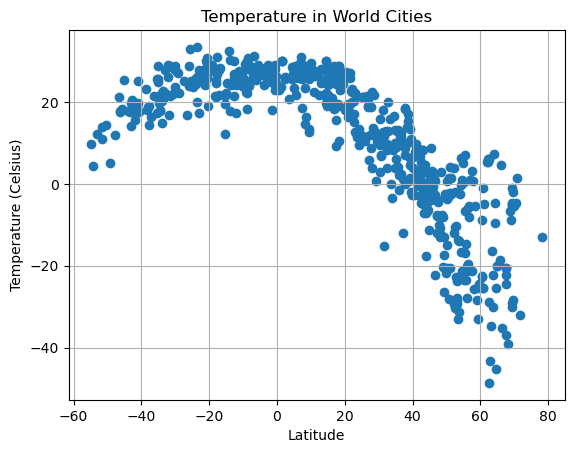

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
#the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()



#### Latitude Vs. Humidity

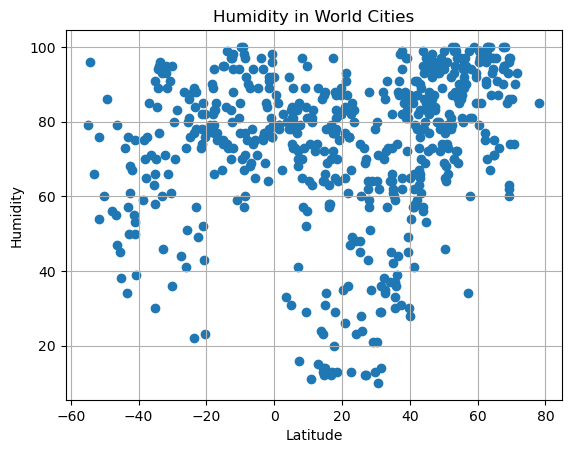

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
#other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")
# Show plot
plt.show()



#### Latitude Vs. Cloudiness

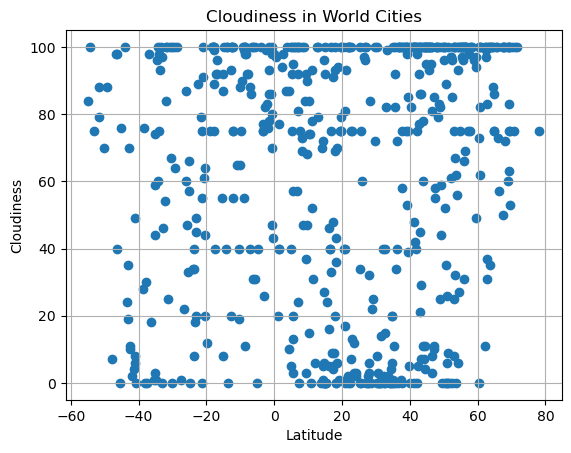

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
#other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

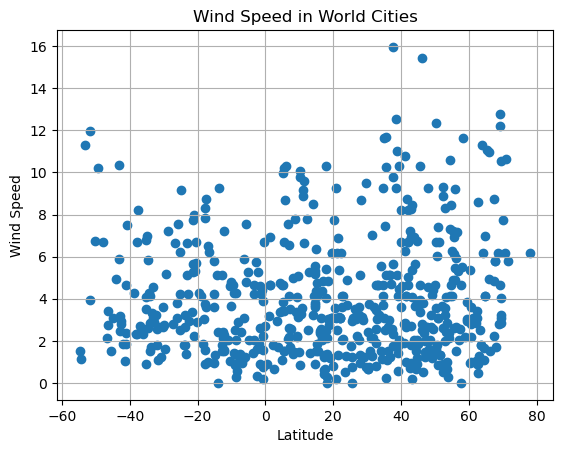

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
#other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linregress_plots(x_val,y_val,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(0.2,0.2),xycoords='figure fraction',fontsize=15,color="red")
    
    print(f'The Pearson Coerrelation Coefficient, r = {rvalue}\nThe Coefficient of Determination r-saqured = {rvalue**2}')
    plt.show()
    

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

#Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,thompson,55.7435,-97.8558,-23.52,95,100,2.61,CA,1704928131
9,zemio,5.0314,25.1361,23.33,31,100,1.08,CF,1704928131
10,buguda,19.8167,84.8000,18.63,82,79,0.79,IN,1704928131
11,vilyuchinsk,52.9306,158.4028,-22.85,70,100,3.25,RU,1704928132
12,kodiak,57.7900,-152.4072,0.73,60,75,0.00,US,1704928132


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,valparaiso,-33.0393,-71.6273,22.22,60,0,3.09,CL,1704927815
1,flying fish cove,-10.4217,105.6791,23.82,94,40,1.03,CX,1704927933
2,edinburgh of the seven seas,-37.0676,-12.3116,16.31,85,98,2.70,SH,1704928130
3,jayapura,-2.5333,140.7000,27.66,85,99,1.59,ID,1704928131
4,adamstown,-25.0660,-130.1015,24.69,81,66,4.24,PN,1704927840


###  Temperature vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = -0.8605874463858447
The Coefficient of Determination r-saqured = 0.7406107528769091


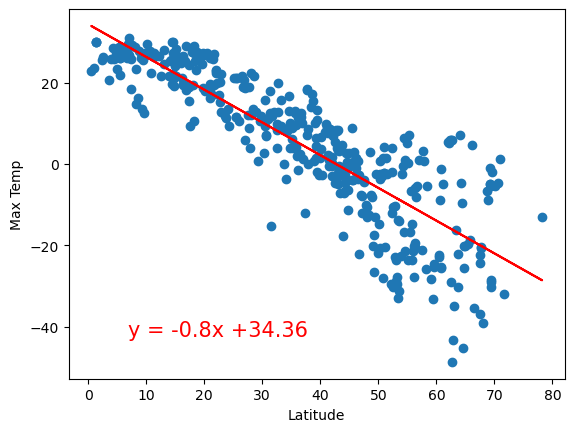

In [21]:
# Linear regression on Northern Hemisphere

n_lat = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"

linregress_plots(n_lat,y_val,xlabel,ylabel)


The Pearson Coerrelation Coefficient, r = 0.6198131100603881
The Coefficient of Determination r-saqured = 0.38416829140273073


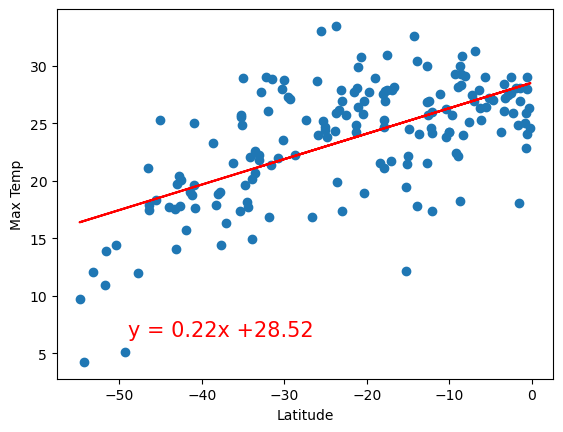

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

s_lat = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"


linregress_plots(s_lat,y_val,xlabel,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = 0.3736091148343023
The Coefficient of Determination r-saqured = 0.1395837706872709


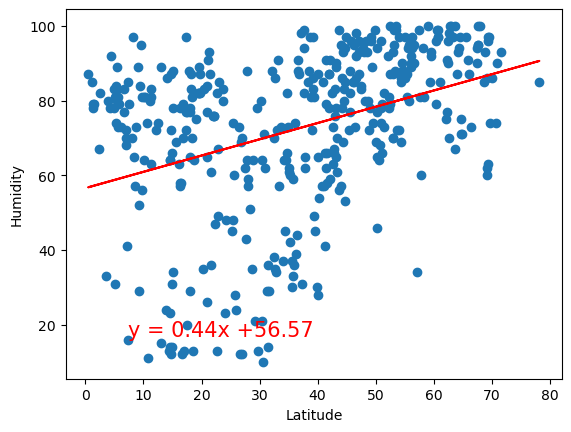

In [23]:
# Northern Hemisphere

y_val = northern_hemi_df["Humidity"]
ylabel = "Humidity"


linregress_plots(n_lat,y_val,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = 0.3699986730113915
The Coefficient of Determination r-saqured = 0.1368990180301906


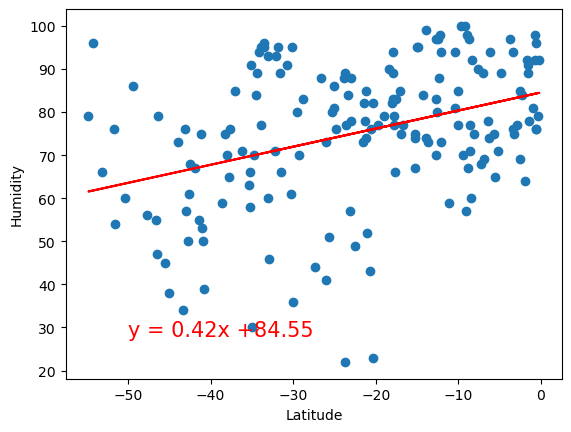

In [24]:
# Southern Hemisphere

y_val = southern_hemi_df["Humidity"]
ylabel = "Humidity"

linregress_plots(s_lat,y_val,xlabel,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = 0.24923168634223175
The Coefficient of Determination r-saqured = 0.06211643347699259


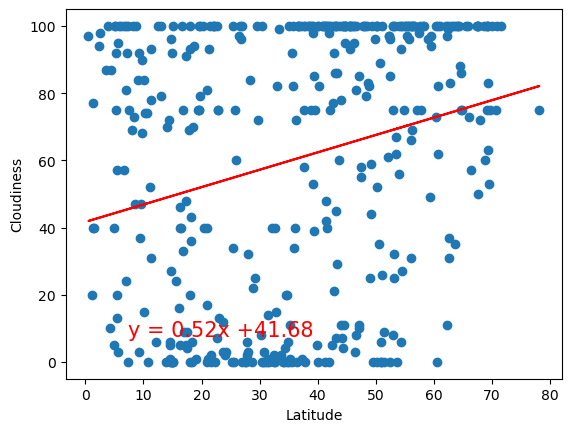

In [25]:
# Northern Hemisphere


y_val = northern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"

linregress_plots(n_lat,y_val,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = 0.273007565783346
The Coefficient of Determination r-saqured = 0.074533130974948


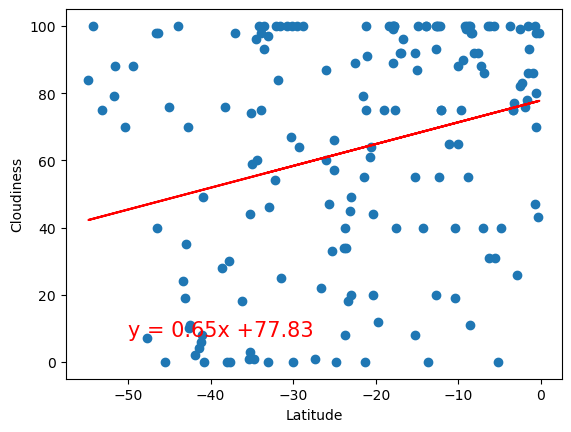

In [26]:
# Southern Hemisphere


y_val = southern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"

linregress_plots(s_lat,y_val,xlabel,ylabel)

Discussion about the linear relationship:Considerable dispersion is evident, and there is no substantial correlation between Latitude and Cloudiness in either the Northern or Southern Hemispheres. There is no relation that can be well accounted for by these two factors and this data alone.

### Wind Speed vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = 0.0925260885428374
The Coefficient of Determination r-saqured = 0.008561077061036988


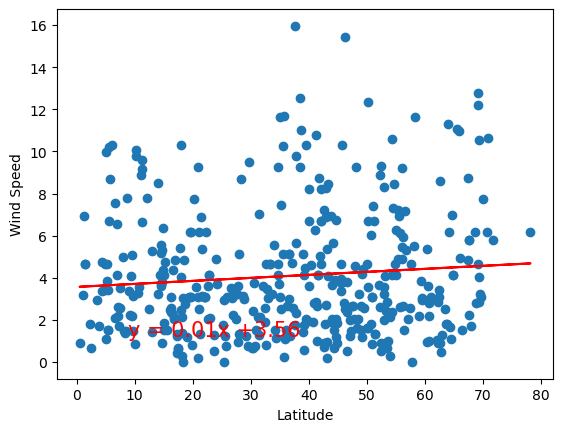

In [27]:
# Northern Hemisphere


y_val = northern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"

linregress_plots(n_lat,y_val,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = -0.21972176510873376
The Coefficient of Determination r-saqured = 0.04827765406249757


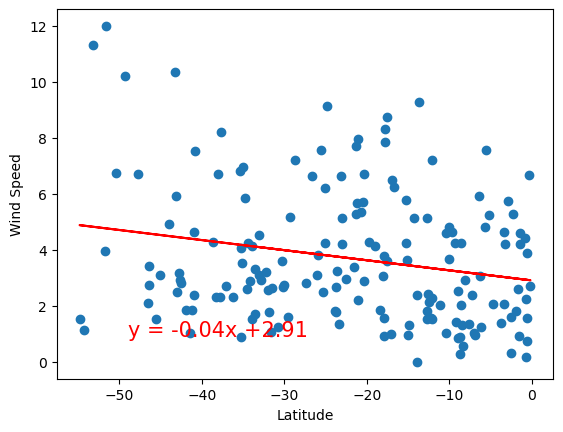

In [28]:
# Southern Hemisphere


y_val = southern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"

linregress_plots(s_lat,y_val,xlabel,ylabel)

**Discussion about the linear relationship:Considerable dispersion is evident, and there is no substantial correlation between Latitude and Wind Speed in either the Northern or Southern Hemispheres. There is no relation that can be well accounted for by these two factors and this data alone.